## Implementing Gradient Boosting from scratch

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [93]:
class GradientBoostingRegression:
    def __init__(self, epochs=100, learning_rate=0.1):
        self.lr = learning_rate
        self.epochs = epochs
        self.r_0 = None
        self.trees = []

    def fit(self, X_train, y_train):
        self.r_0 = y_train.mean()
        i=0
        while i < self.epochs:
            res = []
            if i == 0:
                for j in range(0, len(y_train)):
                    res.append(y_train[j] - self.r_0)

                dtree = DecisionTreeRegressor(max_depth=8)
                dtree.fit(X_train, res)
                self.trees.append(dtree)
                y_pred = self.r_0 + self.lr * dtree.predict(X_train)
                i += 1

            else:
                for k in range(0, len(y_pred)):
                    res.append(y_train[k]-y_pred[k])

                dtree = DecisionTreeRegressor(max_depth = 8)
                dtree.fit(X_train, res)
                self.trees.append(dtree)
                y_pred = y_pred + self.lr * dtree.predict(X_train)
                i += 1

    def predict(self, X_test):
        res = self.r_0
        for tree in self.trees:
            res += self.lr * tree.predict(X_test)

        return res

In [2]:
X = np.random.rand(100, 1)-0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

df = pd.DataFrame()
df["X"] = X.reshape(100)
df["y"] = y

In [3]:
df.head()

,X,y
0,0.041815,0.024384
1,0.280583,0.266480
2,-0.470989,0.696770
3,0.381472,0.350403
4,0.261920,0.162910


In [4]:
df["f0"] = df["y"].mean()
df.head()

,X,y,f0
0,0.041815,0.024384,0.298448
1,0.280583,0.266480,0.298448
2,-0.470989,0.696770,0.298448
3,0.381472,0.350403,0.298448
4,0.261920,0.162910,0.298448


In [5]:
df["res"] = df["y"] - df["f0"]
df.head()

,X,y,f0,res
0,0.041815,0.024384,0.298448,-0.274064
1,0.280583,0.266480,0.298448,-0.031968
2,-0.470989,0.696770,0.298448,0.398322
3,0.381472,0.350403,0.298448,0.051955
4,0.261920,0.162910,0.298448,-0.135538


In [6]:
dtree = DecisionTreeRegressor(max_leaf_nodes=8)
dtree.fit(df["X"].values.reshape(-1, 1), df["res"])

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


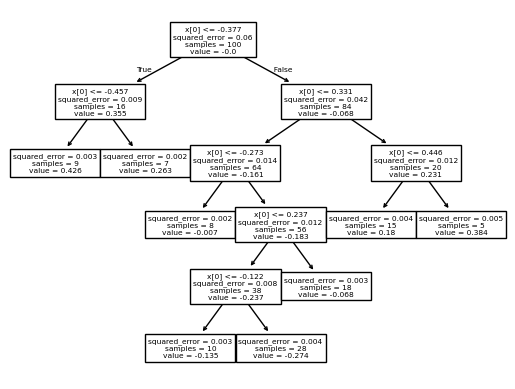

In [7]:
from sklearn.tree import plot_tree
plot_tree(dtree)
plt.show()

In [19]:
df["f1"] = dtree.predict(df["X"].values.reshape(-1, 1))
df.head()

,X,y,f0,res,f1
0,0.433421,0.594701,0.242982,0.351719,0.377656
1,0.499239,0.721004,0.242982,0.478022,0.377656
2,-0.256401,0.170333,0.242982,-0.072650,-0.030536
3,-0.082130,0.030073,0.242982,-0.212909,-0.194387
4,-0.455646,0.667756,0.242982,0.424773,0.429716


In [20]:
df["res2"] = df["y"] - df["f1"]
df.head()

,X,y,f0,res,f1,res2
0,0.433421,0.594701,0.242982,0.351719,0.377656,0.217045
1,0.499239,0.721004,0.242982,0.478022,0.377656,0.343348
2,-0.256401,0.170333,0.242982,-0.072650,-0.030536,0.200869
3,-0.082130,0.030073,0.242982,-0.212909,-0.194387,0.224460
4,-0.455646,0.667756,0.242982,0.424773,0.429716,0.238040


In [94]:
gbd = GradientBoostingRegression(500, 0.2)
gbd.fit(X, y)


In [95]:
X_test = np.array(0.433421)
gbd.predict(X_test.reshape(-1, 1))

array([0.52188525])